<a href="https://colab.research.google.com/github/mehmetaliyucel/public/blob/main/maccsdnnjak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi
!pip install --pre deepchem
!pip install pandas requests mols2grid useful-rdkit-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 34.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.9/710.9 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 11.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.9 MB/s eta 0:00:00
  Created wheel for useful-rdkit-utils: filename=useful_rdkit_utils-0.2.5-py3-none-any.whl size=18

In [ ]:
import numpy as np
import pandas as pd
import rdkit as rd
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import PandasTools
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem as Chem
import deepchem as dc
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation, LSTM, Embedding, CuDNNLSTM
import mols2grid
import pandas as pd
import useful_rdkit_utils as uru
from tqdm.auto import tqdm
from itertools import chain

In [ ]:
import requests
lib_file = requests.get("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/sar_analysis/scaffold_finder.py")
ofs = open("scaffold_finder.py","w")
print(lib_file.text,file=ofs)
ofs.close()
from scaffold_finder import generate_fragments, find_scaffolds, get_molecules_with_scaffold, cleanup_fragment

In [ ]:
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd Colab Notebooks
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/bin/bash: line 0: cd: too many arguments
/content/drive/My Drive/Colab Notebooks


In [ ]:
dataset=pd.read_csv("JAK2 dataset with pIC50.csv")
dataset

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,pIC50,class
0,0,CHEMBL319556,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,10000.00,5.000000,0
1,1,CHEMBL21156,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,1.00,9.000000,1
2,2,CHEMBL104466,COc1cc2ncc(N[C@H]3CC[C@H](O)CC3)nc2cc1OC,50000.00,4.301030,0
3,3,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,240.00,6.619789,0
4,4,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,11.00,7.958607,1
...,...,...,...,...,...,...
6202,6202,CHEMBL4750368,CNc1nc(C)c(C(=O)/C=C/c2ccc(O)cc2)s1,33.88,7.470057,0
6203,6203,CHEMBL4756015,O=C1C=CC2(C=C1)OCC(=O)N2c1nc(-c2cccc3ccccc23)n...,59000.00,4.229148,0
6204,6204,CHEMBL4789639,[2H]C([2H])([2H])NC(=O)c1cnc(NC(=O)C2CC2)cc1Nc...,10000.00,5.000000,0
6205,6205,CHEMBL3685796,Cc1cc(Nc2nccc(C)n2)cc(-c2cnc([C@@]3(O)CC[C@H](...,242.00,6.616185,0


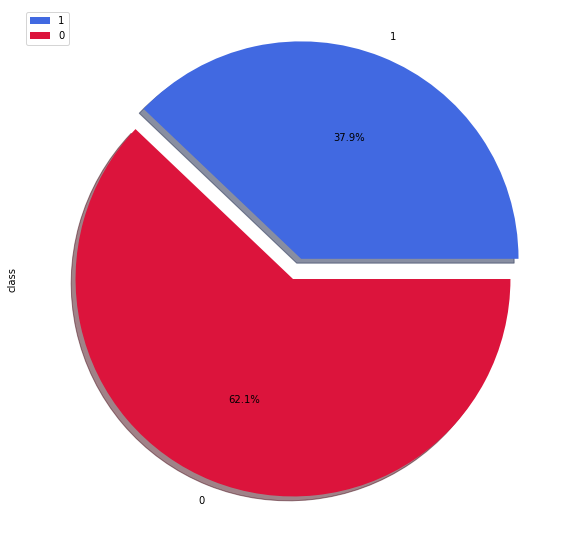

In [ ]:
labels=[1,0]
dataset1=dataset
type_counts = dataset["class"].value_counts()
dataset1 = pd.DataFrame({'class': type_counts},
                       index=labels)
mycolors=['royalblue','crimson']
myexplode=[0.1,0.0]
dataset1.plot.pie(y='class', figsize=(10,10),autopct='%1.1f%%', colors=mycolors, explode=myexplode, shadow= True)
plt.savefig('test1.png', dpi = 400)

In [ ]:
mols= [Chem.MolFromSmiles(i) for i in dataset["canonical_smiles"]]

In [ ]:
maccs_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(m,) for m in mols]
maccs_fps_np=[]
for fps in maccs_fps:
  arr=np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fps,arr)
  maccs_fps_np.append(arr)

In [ ]:
np.array(maccs_fps_np).shape

(6207, 167)

In [ ]:
y=dataset["class"]
maccs_df=pd.DataFrame(maccs_fps_np)
maccs_df["class"]=dataset["class"]
maccs_df
maccs_dfX=maccs_df.iloc[:, 0:167]
maccs_dfy=maccs_df.iloc[:, 167]
maccs_dfX

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
6204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
maccs_dfy

0       0
1       1
2       0
3       0
4       1
       ..
6202    0
6203    0
6204    0
6205    0
6206    0
Name: class, Length: 6207, dtype: int64

In [ ]:
x_morg_train, x_morg_test, y_morg_train, y_morg_test = train_test_split(maccs_dfX, maccs_dfy, test_size=0.1, stratify=maccs_dfy,random_state=0)

In [ ]:
y_morg_test.value_counts()

0    386
1    235
Name: class, dtype: int64

In [ ]:
from keras.engine.input_layer import Input

model = tf.keras.Sequential([    
    tf.keras.layers.Input(shape=(167,)),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])


opt=optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
optimizer=opt,
loss='binary_crossentropy',
metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
patience=100)
opt=optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
optimizer=opt,
loss='binary_crossentropy',
metrics=['binary_accuracy'],
)
history=model.fit(
x_morg_train,y_morg_train,
validation_data=(x_morg_test,y_morg_test),
batch_size=256,
epochs=500,
callbacks=[early_stopping],
verbose=1, # hide the output because we have so many epochs
)

Epoch 1/500
22/22 [==============================] - 1s 22ms/step - loss: 0.6650 - binary_accuracy: 0.6133 - val_loss: 0.6520 - val_binary_accuracy: 0.6264
Epoch 2/500
22/22 [==============================] - 0s 13ms/step - loss: 0.6396 - binary_accuracy: 0.6350 - val_loss: 0.6331 - val_binary_accuracy: 0.6377
Epoch 3/500
22/22 [==============================] - 0s 12ms/step - loss: 0.6234 - binary_accuracy: 0.6563 - val_loss: 0.6219 - val_binary_accuracy: 0.6715
Epoch 4/500
22/22 [==============================] - 0s 12ms/step - loss: 0.6114 - binary_accuracy: 0.6668 - val_loss: 0.6086 - val_binary_accuracy: 0.6779
Epoch 5/500
22/22 [==============================] - 0s 13ms/step - loss: 0.6014 - binary_accuracy: 0.6753 - val_loss: 0.5998 - val_binary_accuracy: 0.6844
Epoch 6/500
22/22 [==============================] - 0s 13ms/step - loss: 0.5935 - binary_accuracy: 0.6833 - val_loss: 0.5975 - val_binary_accuracy: 0.6860
Epoch 7/500
22/22 [==============================] - 0s 13ms/ste

Best Validation Loss: 0.4482
Best Validation Accuracy: 0.8132


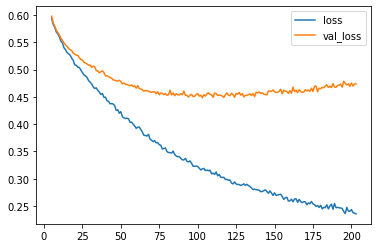

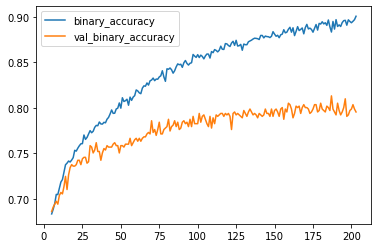

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
          history_df['val_binary_accuracy'].max()))

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model_maccsjak')

INFO:tensorflow:Assets written to: saved_model/my_model_maccsjak/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model_maccsjak')

20/20 [==============================] - 0s 1ms/step
0.7954911433172303
0.7303609341825901
0.5656442972246853
0.7830558924043655


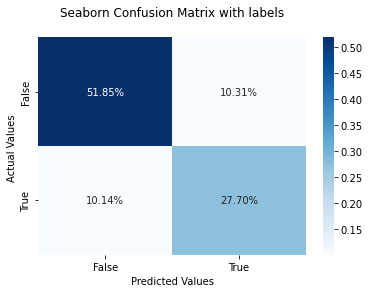

In [ ]:
dnnpreds=new_model.predict(x_morg_test)
dnnpreds=np.round(dnnpreds)
dnnaccu=accuracy_score(y_morg_test,dnnpreds)
print(dnnaccu)
dnnf1=f1_score(y_morg_test,dnnpreds)
print(dnnf1)
dnnmcc=matthews_corrcoef(y_morg_test,dnnpreds)
print(dnnmcc)
dnnroc=roc_auc_score(y_morg_test,dnnpreds)
print(dnnroc)
dnnconf=confusion_matrix(y_morg_test,dnnpreds)
    

ax = sns.heatmap(dnnconf/np.sum(dnnconf), annot=True, 
          fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("maccsjak2.png",dpi=300)

In [ ]:
y_morg_test

2655    0
1762    1
2553    0
4914    0
5950    0
       ..
1331    0
5198    1
1259    1
2054    1
411     0
Name: class, Length: 621, dtype: int64

In [ ]:
tp=[]
fn=[]
fp=[]
tn=[]
for i in range(621):
  if int(dnnpreds[i])==1 and int(np.array(y_morg_test)[i])==0:
    fp.append((y_morg_test).index[i])
  elif int(dnnpreds[i])==0 and int(np.array(y_morg_test)[i])==0:
    tn.append((y_morg_test).index[i])
  elif int(dnnpreds[i])==1 and int(np.array(y_morg_test)[i])==1: 
    tp.append((y_morg_test).index[i])
  elif int(dnnpreds[i])==0 and int(np.array(y_morg_test)[i])==1: 
    fn.append((y_morg_test).index[i])

In [ ]:
len(fp),len(tn),len(tp),len(fn)

(64, 322, 172, 63)

In [ ]:
tp_mols=[]
tp_smiles=[]
tp_names=[]
for i in tp:
  smiles=dataset.loc[i].canonical_smiles
  tp_smiles.append(smiles)
  name=dataset.loc[i].molecule_chembl_id
  tp_names.append(name)
  tp_mol= Chem.MolFromSmiles(smiles) 
  tp_mols.append(tp_mol)
tp_pic50_values=[]
for i in tp_names:
  pic50=dataset.loc[dataset['molecule_chembl_id'] == i].pIC50.values[0]

  tp_pic50_values.append(pic50)
def Average(lst):
    return sum(lst) / len(lst)
Average(tp_pic50_values)

8.458231043849095

In [ ]:
a = {'mol': tp_mols, 'SMILES': tp_smiles, 'Name':tp_names}
tp_df=pd.DataFrame(a)
tp_df

,mol,SMILES,Name
0,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1ccf20>,CC1(c2ccc(Nc3nn([C@H]4CC[C@H](O)C[C@@H]4C#N)cc...,CHEMBL3647863
1,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1d6040>,CC(C)(C)NS(=O)(=O)c1ccc(-c2cc3c(N)ncc(C(=O)NCC...,CHEMBL1938655
2,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1d60b0>,Cc1cnc(Nc2cc(F)c(N3CCOCC3)c(F)c2)nc1-c1cc2c(o1...,CHEMBL4449906
3,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1d6190>,Cc1ncccc1NC(=O)N1CCC(N2CC(CC#N)(n3cc(-c4ncnc5[...,CHEMBL3944093
4,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1d6200>,N#CCC1(n2cc(C(N)=O)c(Nc3ccnc(F)c3)n2)CCN(Cc2cc...,CHEMBL3914149
...,...,...,...
167,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1eca50>,CN(c1ccc(Cl)nn1)[C@@H]1CCN(c2ncnc3[nH]ccc23)C1,CHEMBL3891047
168,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1ecac0>,N#C[C@H]1CC(N(C2CC2)C2CC2)CC[C@@H]1n1cc(C(N)=O...,CHEMBL3647754
169,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1ecb30>,Fc1ccc(-n2cc(-c3cccn4nc(Nc5ccc(C6CCNCC6)cc5)nc...,CHEMBL3645014
170,<rdkit.Chem.rdchem.Mol object at 0x7fe15d1ecba0>,CCc1cc(O)c(F)cc1-c1ccc2c(-c3nc4c([nH]3)CN(Cc3c...,CHEMBL4097152


In [ ]:
ring_system_finder=uru.RingSystemFinder()

In [ ]:
tp_df['ring_systems']=tp_df.mol.progress_apply(ring_system_finder.find_ring_systems)

  0%|          | 0/172 [00:00<?, ?it/s]

In [ ]:
tp_ring_list = chain(*tp_df.ring_systems.values)
tp_ring_list

In [ ]:
tp_ring_series = pd.Series(tp_ring_list)
tp_ring_series

0                        C1COC1
1                      c1ccccc1
2                    c1cn[nH]c1
3                      C1CCCCC1
4                      c1ccccc1
                 ...           
614          c1nc2c([nH]1)CNCC2
615                    c1ccccc1
616    c1ccc2c(c1)[nH]c1ccccc12
617                    c1ccccc1
618                    C1COCCN1
Length: 619, dtype: object

In [ ]:
tp_ring_series.value_counts()

c1ccccc1                                         139
c1cn[nH]c1                                        85
C1CCNCC1                                          67
c1ncc2cc[nH]c2n1                                  41
C1CCCCC1                                          38
c1ccncc1                                          38
C1CNC1                                            31
c1cncnc1                                          20
C1CCNC1                                           18
c1ccn2ncnc2c1                                     18
C1CNCCN1                                          12
C1COCCN1                                          11
c1cc2cncnn2c1                                      7
c1cnc2[nH]ccc2n1                                   7
c1ccc2c(c1)[nH]c1ccccc12                           6
C1CC1                                              6
c1cnc2[nH]ccc2c1                                   5
c1cc2c(ncn3nncc23)[nH]1                            4
C1CCOCC1                                      

In [ ]:
tp_ring_df = pd.DataFrame(tp_ring_series.value_counts()).reset_index()
tp_ring_df.columns = ["SMILES","Count"]
tp_ring_df

,SMILES,Count
0,c1ccccc1,139
1,c1cn[nH]c1,85
2,C1CCNCC1,67
3,c1ncc2cc[nH]c2n1,41
4,C1CCCCC1,38
5,c1ccncc1,38
6,C1CNC1,31
7,c1cncnc1,20
8,C1CCNC1,18
9,c1ccn2ncnc2c1,18


In [ ]:
mols2grid.display(tp_ring_df,smiles_col="SMILES",subset=["img","Count"],selection=False)

MolGridWidget()

In [ ]:
mol_df, scaffold_tp_df = find_scaffolds(tp_df)
scaffold_tp_df

  0%|          | 0/172 [00:00<?, ?it/s]

,Scaffold,Count,NumAtoms
3299,N#C[C@H]1CCCC[C@@H]1n1cc(C(N)=O)c(Nc2ccccc2)n1,19,23
3684,NC(=O)c1cn(C2CCCCC2)nc1Nc1ccccc1,17,21
3675,NC(=O)c1cn(C2CCCCC2)nc1Nc1ccc(S(=O)(=O)C(F)F)cc1,10,27
3683,NC(=O)c1cn(C2CCCCC2)nc1Nc1ccc([SH](=O)=O)cc1,10,24
1517,CN(c1ccccn1)[C@@H]1CCN(c2ncnc3[nH]ccc23)C1,9,22
...,...,...,...
1767,CNc1cncc(Nc2nccs2)n1,1,14
3472,N#Cc1ccc(N[C@@H]2CCNC2)cc1,1,14
3603,NC(=O)c1cccn1-c1ccccc1,1,14
3915,Nc1nccc(Nc2cc(O)[nH]n2)n1,1,14


In [ ]:
mols2grid.display(scaffold_tp_df.head(70),smiles_col="Scaffold",subset=["img","Count"],size=(220,220))

MolGridWidget()

In [ ]:
morg_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol) for mol in tp_mols]
s=[]
for i in range(len(tp_mols)-1):
  s.append(DataStructs.FingerprintSimilarity(morg_fps[i],morg_fps[i+1]))
print(min(s))
print(max(s))
s=np.array(s)

0.2804878048780488
0.9113924050632911


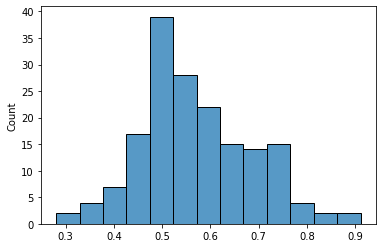

In [ ]:
gr=sns.histplot(s,bins="auto")
plt.savefig("maccsjak2tpsimilarity.png",dpi=300)

In [ ]:
fn_mols=[]
fn_smiles=[]
fn_names=[]
for i in fn:
  smiles=dataset.loc[i].canonical_smiles
  fn_smiles.append(smiles)
  name=dataset.loc[i].molecule_chembl_id
  fn_names.append(name)
  fn_mol= Chem.MolFromSmiles(smiles) 
  fn_mols.append(fn_mol)
fn_pic50_values=[]
for i in fn_names:
  pic50=dataset.loc[dataset['molecule_chembl_id'] == i].pIC50.values[0]

  fn_pic50_values.append(pic50)
def Average(lst):
    return sum(lst) / len(lst)
Average(fn_pic50_values)

8.083334128554418

In [ ]:
a = {'mol': fn_mols, 'SMILES': fn_smiles, 'Name':fn_names}
fn_df=pd.DataFrame(a)
fn_df

,mol,SMILES,Name
0,<rdkit.Chem.rdchem.Mol object at 0x7fe15560e510>,Clc1cnc2nc1NCCc1cccc(c1)OCCc1cccc(c1)N2,CHEMBL3694585
1,<rdkit.Chem.rdchem.Mol object at 0x7fe15560e2e0>,CC1(C)CN([C@H]2CC[C@H](n3cc(C(N)=O)c(Nc4ccc(Cl...,CHEMBL3647721
2,<rdkit.Chem.rdchem.Mol object at 0x7fe15560e350>,Cc1[nH]nc2[nH]c(=O)cc([C@H]3CC[C@H](CC(=O)N4CC...,CHEMBL4639606
3,<rdkit.Chem.rdchem.Mol object at 0x7fe15560e580>,CCc1ccc(Cl)cc1-n1cc(-c2ncnn3cccc23)cc1C(N)=O,CHEMBL3403546
4,<rdkit.Chem.rdchem.Mol object at 0x7fe15560e190>,O=C(O)CCCCCCOc1ccc2cc1COC/C=C/COCc1cccc(c1)-c1...,CHEMBL3920872
...,...,...,...
58,<rdkit.Chem.rdchem.Mol object at 0x7fe155622b30>,CC(Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1cc(F)ccc1Cl,CHEMBL4541291
59,<rdkit.Chem.rdchem.Mol object at 0x7fe155622ba0>,OC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,CHEMBL3906967
60,<rdkit.Chem.rdchem.Mol object at 0x7fe155622c10>,CC(Oc1cc(-c2c[nH]c3ccncc23)cnc1N)c1cc(F)ccc1Cl,CHEMBL4645876
61,<rdkit.Chem.rdchem.Mol object at 0x7fe155622c80>,CCc1cc(O)c(F)cc1-c1ccc2c(-c3nc4c([nH]3)CCN(C(=...,CHEMBL3644620


In [ ]:
fn_df['ring_systems']=fn_df.mol.progress_apply(ring_system_finder.find_ring_systems)
fn_ring_list = chain(*fn_df.ring_systems.values)
fn_ring_list
fn_ring_series = pd.Series(fn_ring_list)
fn_ring_series
fn_ring_series.value_counts()
fn_ring_df = pd.DataFrame(fn_ring_series.value_counts()).reset_index()
fn_ring_df.columns = ["SMILES","Count"]
fn_ring_df
mols2grid.display(fn_ring_df,smiles_col="SMILES",subset=["img","Count"],selection=False)

  0%|          | 0/63 [00:00<?, ?it/s]

MolGridWidget()

In [ ]:
mol_df, scaffold_fn_df = find_scaffolds(fn_df)
scaffold_fn_df

  0%|          | 0/63 [00:00<?, ?it/s]

,Scaffold,Count,NumAtoms
592,CN1CC[C@@H](C#N)[C@H](n2cc(C(N)=O)c(Nc3ccc(F)c...,4,25
593,CN1CC[C@@H](C#N)[C@H](n2cc(C(N)=O)c(Nc3ccccc3)...,4,24
1262,N#C[C@@H]1CCNC[C@H]1n1cc(C(N)=O)c(Nc2ccc(F)cc2)n1,4,24
559,CN1CCC[C@H](n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2)C1,4,23
1263,N#C[C@@H]1CCNC[C@H]1n1cc(C(N)=O)c(Nc2ccccc2)n1,4,23
...,...,...,...
1453,NC(=O)c1cnn([C@@H]2CCCOC2)c1,1,14
1678,c1nc(N2CCCC2)c2cc[nH]c2n1,1,14
655,CNC(=O)c1cncc2ccsc12,1,13
1440,NC(=O)c1cnc(N)c2ccsc12,1,13


In [ ]:
mols2grid.display(scaffold_fn_df.head(100),smiles_col="Scaffold",subset=["img","Count"],size=(220,220))

MolGridWidget()

In [ ]:
morg_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol) for mol in fn_mols]
s=[]
for i in range(len(fn_mols)-1):
  s.append(DataStructs.FingerprintSimilarity(morg_fps[i],morg_fps[i+1]))
print(min(s))
print(max(s))
s=np.array(s)

0.2987012987012987
0.7818181818181819


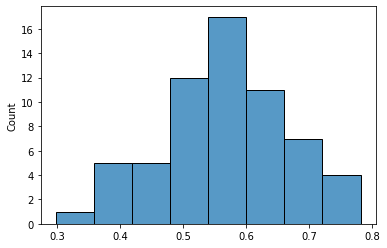

In [ ]:
gr=sns.histplot(s,bins="auto")
plt.savefig("maccsjak2fnsimilarit.png",dpi=300)

In [ ]:
fp_mols=[]
fp_smiles=[]
fp_names=[]
for i in fp:
  smiles=dataset.loc[i].canonical_smiles
  fp_smiles.append(smiles)
  name=dataset.loc[i].molecule_chembl_id
  fp_names.append(name)
  fp_mol= Chem.MolFromSmiles(smiles) 
  fp_mols.append(fp_mol)

In [ ]:
type(fp_names[0])

str

In [ ]:
fp_pic50_values=[]
for i in fp_names:
  pic50=dataset.loc[dataset['molecule_chembl_id'] == i].pIC50.values[0]

  fp_pic50_values.append(pic50)
def Average(lst):
    return sum(lst) / len(lst)
Average(fp_pic50_values)

6.93163200287419

In [ ]:
d = {'mol': fp_mols, 'SMILES': fp_smiles, 'Name':fp_names}
fp_df=pd.DataFrame(d)
fp_df

,mol,SMILES,Name
0,<rdkit.Chem.rdchem.Mol object at 0x7fe155aac660>,[C-]#[N+][C@@H]1C[C@@H](N(C)C2COC2)CC[C@H]1n1c...,CHEMBL3647814
1,<rdkit.Chem.rdchem.Mol object at 0x7fe164334430>,CN(c1ncnc2[nH]ccc12)[C@H]1CC[C@H](CS(=O)(=O)N2...,CHEMBL3639512
2,<rdkit.Chem.rdchem.Mol object at 0x7fe164334510>,CC(OC(=O)N1CCC(CC#N)(n2cc(C(N)=O)c(Nc3ccc(F)cc...,CHEMBL3977586
3,<rdkit.Chem.rdchem.Mol object at 0x7fe155ab00b0>,CCS(=O)(=O)N1CC(CC#N)(n2cc(C(N)=O)c(Nc3ccc(C(=...,CHEMBL3939533
4,<rdkit.Chem.rdchem.Mol object at 0x7fe1556fc7b0>,O=C1c2cnc3[nH]ccc3c2N([C@H]2CC[C@H](CNS(=O)(=O...,CHEMBL3981673
...,...,...,...
59,<rdkit.Chem.rdchem.Mol object at 0x7fe155702270>,N#C[C@H]1C[C@H](O)CC[C@@H]1n1cc(C(N)=O)c(Nc2cc...,CHEMBL3702938
60,<rdkit.Chem.rdchem.Mol object at 0x7fe1557022e0>,Fc1ccc(CNC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)...,CHEMBL3984960
61,<rdkit.Chem.rdchem.Mol object at 0x7fe155702350>,N#CCC1(n2cc(-c3ncnc4[nH]ccc34)cn2)CN(C2CCN(C(=...,CHEMBL3938229
62,<rdkit.Chem.rdchem.Mol object at 0x7fe1557023c0>,CCS(=O)(=O)N1CCN(C[C@H]2CC[C@H](c3nnn4cnc5[nH]...,CHEMBL3893196


In [ ]:
fp_df['ring_systems']=fp_df.mol.progress_apply(ring_system_finder.find_ring_systems)
fp_ring_list = chain(*fp_df.ring_systems.values)
fp_ring_list
fp_ring_series = pd.Series(fp_ring_list)
fp_ring_series
fp_ring_series.value_counts()
fp_ring_df = pd.DataFrame(fp_ring_series.value_counts()).reset_index()
fp_ring_df.columns = ["SMILES","Count"]
fp_ring_df
mols2grid.display(fp_ring_df,smiles_col="SMILES",subset=["img","Count"],selection=False)

  0%|          | 0/64 [00:00<?, ?it/s]

MolGridWidget()

In [ ]:
mol_df, scaffold_df = find_scaffolds(fp_df)
scaffold_df

  0%|          | 0/64 [00:00<?, ?it/s]

,Scaffold,Count,NumAtoms
1596,NC(=O)c1cn(C2CCCCC2)nc1Nc1ccccc1,9,21
1165,N#CCC1(n2cc(C(N)=O)c(Nc3ccccc3)n2)CCCCC1,6,24
225,CC1(n2cc(C(N)=O)c(Nc3ccccc3)n2)CCCCC1,5,22
1268,N#CCC1(n2ccc(Nc3ccccc3)n2)CCCCC1,5,21
1130,N#CCC1(n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2)CCCCC1,4,25
...,...,...,...
1667,NC(=O)c1cnn(C2CCC[C@@H](O)C2)c1,1,15
1668,NC(=O)c1cnn(C2CCC[C@H](O)C2)c1,1,15
1693,N[C@H]1CC[C@H](CS(=O)(=O)N2CCC2)CC1,1,15
533,CCn1cc(Nc2ncccn2)cn1,1,14


In [ ]:
mols2grid.display(scaffold_df.head(50),smiles_col="Scaffold",subset=["img","Count"],size=(220,220))

MolGridWidget()

In [ ]:
morg_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol) for mol in fp_mols]
s=[]
for i in range(len(fp_mols)-1):
  s.append(DataStructs.FingerprintSimilarity(morg_fps[i],morg_fps[i+1]))
print(min(s))
print(max(s))
s=np.array(s)

0.3023255813953488
0.890625


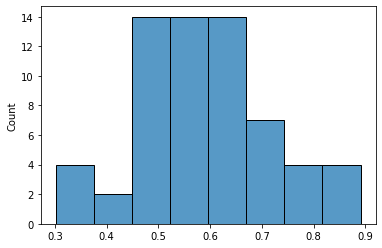

In [ ]:
gr=sns.histplot(s,bins="auto")
plt.savefig("maccsjak2fpsimilarity.png",dpi=300)

In [ ]:
tn_mols=[]
tn_smiles=[]
tn_names=[]
for i in tn:
  smiles=dataset.loc[i].canonical_smiles
  tn_smiles.append(smiles)
  name=dataset.loc[i].molecule_chembl_id
  tn_names.append(name)
  tn_mol= Chem.MolFromSmiles(smiles) 
  tn_mols.append(tn_mol)
c = {'mol': tn_mols, 'SMILES': tn_smiles, 'Name':tn_names}
tn_df=pd.DataFrame(c)

In [ ]:
tn_df

,mol,SMILES,Name
0,<rdkit.Chem.rdchem.Mol object at 0x7fe1555906d0>,N#C[C@H]1C[C@@H](C(=O)NC2CC2)CC[C@@H]1n1cc(C(N...,CHEMBL3647896
1,<rdkit.Chem.rdchem.Mol object at 0x7fe1555905f0>,CN1CCN(c2ccc(Nc3nc4c(Nc5ccccc5CN(C)S(C)(=O)=O)...,CHEMBL3642392
2,<rdkit.Chem.rdchem.Mol object at 0x7fe155590580>,N#C[C@@H]1CN(C(=O)OC2CCCC2)CC[C@H]1n1cc(C(N)=O...,CHEMBL4107008
3,<rdkit.Chem.rdchem.Mol object at 0x7fe1555907b0>,C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(B(O)O)cc3)ncc2C(F...,CHEMBL4640647
4,<rdkit.Chem.rdchem.Mol object at 0x7fe155590820>,Fc1ccc(NC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)C...,CHEMBL3910680
...,...,...,...
317,<rdkit.Chem.rdchem.Mol object at 0x7fe155566820>,Fc1cc(NC[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5c34)CC...,CHEMBL3937326
318,<rdkit.Chem.rdchem.Mol object at 0x7fe155566890>,N#C[C@H]1CCN(C[C@H]2CC[C@H](c3nnn4cnc5[nH]ccc5...,CHEMBL4107757
319,<rdkit.Chem.rdchem.Mol object at 0x7fe155566900>,C=CC(=O)Nc1cccc(CNc2cc(Nc3cnn(CCO)c3)ncn2)c1,CHEMBL4572373
320,<rdkit.Chem.rdchem.Mol object at 0x7fe155566970>,CCN(C(=O)c1cc2c3c(ncn3C)c(NC)nc2n1C[C@H](O)CO)...,CHEMBL3622140


In [ ]:
tn_df['ring_systems']=tn_df.mol.progress_apply(ring_system_finder.find_ring_systems)
tn_ring_list = chain(*tn_df.ring_systems.values)
tn_ring_list
tn_ring_series = pd.Series(tn_ring_list)
tn_ring_series
tn_ring_series.value_counts()
tn_ring_df = pd.DataFrame(tn_ring_series.value_counts()).reset_index()
tn_ring_df.columns = ["SMILES","Count"]
tn_ring_df
mols2grid.display(tn_ring_df,smiles_col="SMILES",subset=["img","Count"],selection=False)

  0%|          | 0/322 [00:00<?, ?it/s]

MolGridWidget()

In [ ]:
tn_pic50_values=[]
for i in tn_names:
  pic50=dataset.loc[dataset['molecule_chembl_id'] == i].pIC50.values[0]

  tn_pic50_values.append(pic50)
def Average(lst):
    return sum(lst) / len(lst)
Average(tn_pic50_values)

6.189886606495816

In [ ]:
mol_tn_df, scaffold_tn_df = find_scaffolds(tn_df)

  0%|          | 0/322 [00:00<?, ?it/s]

In [ ]:
scaffold_tn_df

,Scaffold,Count,NumAtoms
6918,c1cc2c(ncn3nnc(C4CCCCC4)c23)[nH]1,15,18
5646,NC(=O)c1cn(C2CCCCC2)nc1Nc1ccccc1,14,21
5884,NC(=O)c1cnn2ccc(N3CCC[C@@H]3c3cccc(F)c3)nc12,13,24
5887,NC(=O)c1cnn2ccc(N3CCC[C@@H]3c3ccccc3)nc12,13,23
4850,Fc1cccc([C@H]2CCCN2c2ccn3nccc3n2)c1,13,21
...,...,...,...
131,C=Cc1ccc(NC)cc1,1,10
1266,CC=Cc1ccc(N)cc1,1,10
6125,Nc1ncnc2[nH]ccc12,1,10
1268,CC=Cc1ccccc1,1,9


In [ ]:
mols2grid.display(scaffold_tn_df.head(40),smiles_col="Scaffold",subset=["img","Count"],size=(220,220))


MolGridWidget()

In [ ]:
morg_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol) for mol in tn_mols]
s=[]
for i in range(len(tn_mols)-1):
  s.append(DataStructs.FingerprintSimilarity(morg_fps[i],morg_fps[i+1]))
print(min(s))
print(max(s))
s=np.array(s)

0.19480519480519481
0.8701298701298701


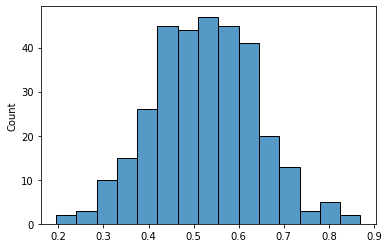

In [ ]:
gr=sns.histplot(s,bins="auto")
plt.savefig("maccsjak2tnsimilarity.png",dpi=300)

In [ ]:
grup_dataset=pd.read_csv("MAY smiles code.csv")
grup_dataset

,Unnamed: 0,Unnamed: 0.1,Bileşiklerin Kodu,smiles,pIC50 values
0,0,0,AHT-13,C12=CC=CC=C1OC(C3=CC=C(C=CC=C4)C4=C3)=N2,NaN
1,1,1,AHT-14,C12=CC=CC=C1SC(C3=CC=C(C=CC=C4)C4=C3)=N2,NaN
2,2,2,AHT-30,C12=CC=CC=C1OC(CC3=CC=C(C=CC=C4)C4=C3)=N2,NaN
3,3,3,AHT-18,C12=CC=CC=C1SC(CC3=CC=C(C=CC=C4)C4=C3)=N2,NaN
4,4,4,AHT-27,OC1=CC=C(C=CC=C2)C2=C1C3=NC4=CC=CC=C4O3,NaN
...,...,...,...,...,...
182,182,182,EA-12,O=C(/C=C/C1=NC2=C(C=CC([N+]([O-])=O)=C2)N1)C3=...,NaN
183,183,183,EA-13,O=C(/C=C/C1=NC2=C(C=CC=C2)N1)C3=NC4=CC([N+]([O...,NaN
184,184,184,EA-14,O=C(/C=C/C1=NC2=C(C=CC(C)=C2)N1)C3=NC4=CC([N+]...,NaN
185,185,185,EA-15,O=C(/C=C/C1=NC2=C(C=CC(Cl)=C2)N1)C3=NC4=CC([N+...,NaN


In [ ]:
grup_mols= [Chem.MolFromSmiles(i) for i in grup_dataset["smiles"]]
grup_morg6_fps=[Chem.rdMolDescriptors.GetMACCSKeysFingerprint(grup_mol) for grup_mol in grup_mols]
grup_morg6_fps_np=[]
for fp in grup_morg6_fps:
  arr=np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp,arr)
  grup_morg6_fps_np.append(arr)
grup_y=grup_dataset["pIC50 values"]
grup_morg_X=grup_morg6_fps_np
np.array(grup_morg_X).shape
grup_df=pd.DataFrame(grup_morg_X)
grup_df["pIC50 values"]=grup_dataset["pIC50 values"]
grup_df
grup_dfX = grup_df.iloc[:, 0:167]
grup_dfy=grup_df.iloc[:, 167]
grup_dfX

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
grup_preds=new_model.predict(grup_dfX)

In [ ]:
import mols2grid
import numpy as np

grup_positives=[]
grup_negatives=[]
for i in range(len(grup_preds)):


  if (grup_preds[i])>=0.87:
    grup_positives.append(i)
  elif (grup_preds[i])<0.5:
    grup_negatives.append(i)

grup_kodlar=[]
for i in grup_positives:
  kod=grup_dataset["Bileşiklerin Kodu"][i]
  grup_kodlar.append(kod)
print(grup_kodlar)
print(len(grup_kodlar))
grup_mols=[]
grup_smiles=[]
for i in grup_positives:
  smile=grup_dataset.smiles[i]
  grup_smiles.append(smile)
for smile in grup_smiles:
  a=Chem.MolFromSmiles(smile)
  grup_mols.append(a)
mols2grid.display(grup_mols)

['ORT-12']
1


MolGridWidget()